In [177]:
import pandas
from IPython.display import display

df=pandas.read_json('raw_matches_dataset.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'average_rating': int, 'cheats' : bool, 'game_type': int, 
                                                        'lock_speed': bool, 'lock_teams': bool, 'map_size': int, 'pop': int, 
                                                        'ranked': bool, 'map_type' : int, 'leaderboard_id': int, 
                                                        'rating_type': int, 'shared_exploration' : bool, 'team_together' : bool, 
                                                        'team_positions': bool, 'turbo' : bool, 'victory' : int, 
                                                        'victory_time' : int, 'visibility' : int, 'opened' : int, 
                                                        'started': int, 'finished' : int, 'players' : [dict]})
pandas.options.display.max_columns = None
df.dtypes

average_rating        float64
cheats                   bool
ending_age              int64
expansion             float64
finished                int64
full_tech_tree        float64
game_type               int64
has_custom_content    float64
has_password          float64
leaderboard_id          int64
lobby_id              float64
lock_speed               bool
lock_teams               bool
map_size                int64
map_type              float64
match_id                int64
match_uuid             object
name                   object
num_players             int64
num_slots               int64
opened                  int64
players                object
pop                   float64
ranked                   bool
rating_type             int64
resources             float64
rms                    object
scenario               object
server                 object
shared_exploration       bool
speed                 float64
started                 int64
starting_age            int64
team_posit

In [178]:
df['cheats']=df['cheats'].astype('category')
df['game_type']=df['game_type'].astype('category')
df['visibility']=df['visibility'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['ranked']=df['ranked'].astype('category')
df['lock_teams']=df['lock_teams'].astype('category')
df['turbo']=df['turbo'].astype('category')
df['team_positions']=df['team_positions'].astype('category')
df['team_together']=df['team_together'].astype('category')

Multiplicamos por "speed", pois é a velocidade do jogo, que pode vir a variar de partida para partida, então decidimos usar o tempo que se passou dentro de cada partida do jogo. O tempo da partida pode variar entre: 1,7~2 * (tempo do mundo real).

In [179]:
df['duration']=((df['finished'] - df['started']) * df['speed'])/60

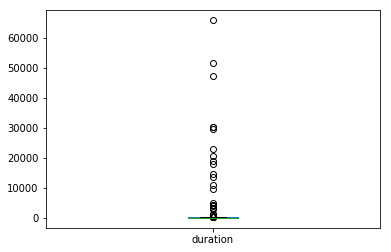

In [180]:
df_with_cheats['duration'].plot.box()

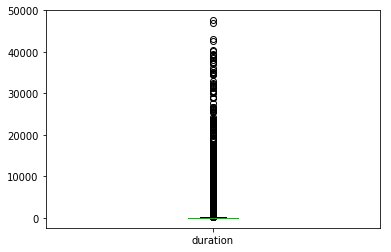

In [181]:
df_without_cheats['duration'].plot.box()

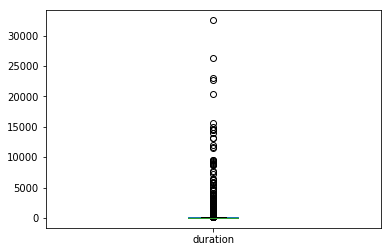

In [182]:
df_ranked=df_without_cheats[df_without_cheats['ranked'] == True]
df_unranked=df_without_cheats[df_without_cheats['ranked'] == False]

df_ranked['duration'].plot.box()

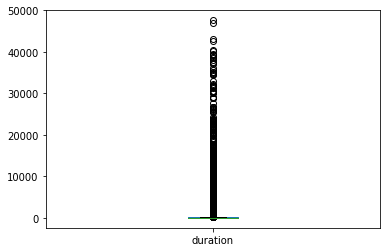

In [183]:
df_unranked['duration'].plot.box()

Visivelmente há bastante outliers no tempo de duração das partidas, pois 40.000 minutos é um tempo de  duração incomuns, a título de comparação: Um jogador famoso de Age of empires 2 comentou e publicou uma partida que durou 780 minutos(de tempo dentro do jogo) e a chamou de "The longest aoe2 game ever!".

Percebe-se também que as partidas "rankeadas" demonstram ter um menor número de outliers. Isso nos fez rememorar que partidas "rankeadas" são partidas competitivas, o que quer dizer que as pessoas as jogam com mais seriedade, o que traz dados mais certeiros quanto à qualidade da partida.

Abaixo, excluímos colunas irrelevantes para informar o andamento da partida ou colunas que já têm valores padronizados em partidas "rankeadas", além de fazer algumas filtragens para deixar as partidas no formato rankeadas de "mapa aleatório", que é o tipo de "rankeada" padrão.

In [184]:
print(str(len(df[df['average_rating'].isnull()])) + " " + str(len(df[df['average_rating'] >= 0])))

50926 9074


Average_rating é a média das classificações dos jogadores, uma informação as vezes útil, porém 5/6 das linhas
têm seu valor como NaN.

Nesse arquivo apenas excluo as colunas e filtro os dados advindos da API, no próximo arquivo "data_treatment" realizamos as detecções de outliers, o tratamento dos dados ausentes, a normalização e a discretização.

In [185]:
df=df[df['cheats'] == False]

df=df.drop('cheats', 1)

df=df.drop('average_rating', 1)

df=df.drop('expansion', 1)

df=df.drop('server', 1)

df=df.drop('name', 1)

In [186]:
df

,ending_age,finished,full_tech_tree,game_type,has_custom_content,has_password,leaderboard_id,lobby_id,lock_speed,lock_teams,map_size,map_type,match_id,match_uuid,num_players,num_slots,opened,players,pop,ranked,rating_type,resources,rms,scenario,shared_exploration,speed,started,starting_age,team_positions,team_together,treaty_length,turbo,version,victory,victory_time,visibility,duration
0,5,1601225257,0.0,0,NaN,1.0,3,NaN,True,True,0,9.0,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,2,1601223368,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,62.966667
1,5,1601224612,0.0,0,NaN,1.0,3,NaN,True,True,0,9.0,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,2,1601223368,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",200.0,True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,41.466667
2,5,1601224747,0.0,0,NaN,1.0,3,NaN,True,True,0,9.0,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,2,1601223368,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,45.966667
3,5,1601226856,0.0,0,NaN,1.0,4,NaN,True,True,2,125.0,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,4,1601223368,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",200.0,True,4,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,116.266667
4,5,1601226257,0.0,0,NaN,1.0,3,NaN,True,True,0,9.0,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,2,1601223368,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,96.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,1602078313,0.0,0,NaN,0.0,0,NaN,True,True,4,12.0,42258758,16f92b01-f4d5-1e41-9b59-49ff4c92c30c,8,8,1602074771,"[{'civ': 12, 'clan': None, 'color': 5, 'countr...",250.0,False,0,0.0,None,None,True,2.0,1602075071,0,False,True,0,False,40874.0,1.0,1.0,1.0,108.066667
59996,5,1602076991,0.0,0,NaN,1.0,3,NaN,True,True,0,87.0,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,2,1602075042,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1602075076,0,True,True,0,False,40874.0,1.0,0.0,0.0,63.833333
59997,5,1602077785,0.0,0,NaN,1.0,4,NaN,True,True,4,12.0,42259207,441f5659-fb65-f649-b758-97bf52745f75,8,8,1602075042,"[{'civ': 21, 'clan': None, 'color': 4, 'countr...",200.0,True,4,0.0,None,None,False,2.0,1602075086,0,True,True,0,False,40874.0,1.0,0.0,1.0,89.966667
59998,0,1602078302,0.0,0,NaN,0.0,0,NaN,True,True,4,33.0,42259146,87e106dc-f63f-4943-8b91-14913dd19bf2,8,8,1602075001,"[{'civ': 34, 'clan': None, 'color': 7, 'countr...",200.0,False,0,0.0,None,None,False,2.0,1602075086,0,False,True,0,False,40874.0,1.0,1.0,0.0,107.200000


In [187]:
df=df[df['pop'] == 200]

df=df.drop('pop', 1)

df=df[df['game_type'] == 0]

df=df.drop('game_type', 1)

df=df.drop('has_password', 1)

df=df.drop('map_size', 1)

In [188]:
df

,ending_age,finished,full_tech_tree,has_custom_content,leaderboard_id,lobby_id,lock_speed,lock_teams,map_type,match_id,match_uuid,num_players,num_slots,opened,players,ranked,rating_type,resources,rms,scenario,shared_exploration,speed,started,starting_age,team_positions,team_together,treaty_length,turbo,version,victory,victory_time,visibility,duration
0,5,1601225257,0.0,NaN,3,NaN,True,True,9.0,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,2,1601223368,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,62.966667
1,5,1601224612,0.0,NaN,3,NaN,True,True,9.0,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,2,1601223368,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,41.466667
2,5,1601224747,0.0,NaN,3,NaN,True,True,9.0,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,2,1601223368,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,45.966667
3,5,1601226856,0.0,NaN,4,NaN,True,True,125.0,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,4,1601223368,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",True,4,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,116.266667
4,5,1601226257,0.0,NaN,3,NaN,True,True,9.0,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,2,1601223368,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1601223368,0,True,True,0,False,40874.0,1.0,0.0,0.0,96.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,1602091465,0.0,NaN,0,1.097752e+17,True,True,141.0,42258793,d62be938-2a18-874c-aa4f-309c2226d169,6,6,1602074791,"[{'civ': 28, 'clan': None, 'color': 3, 'countr...",False,0,0.0,None,None,False,2.0,1602075071,0,False,True,0,False,40874.0,1.0,1.0,0.0,546.466667
59996,5,1602076991,0.0,NaN,3,NaN,True,True,87.0,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,2,1602075042,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1602075076,0,True,True,0,False,40874.0,1.0,0.0,0.0,63.833333
59997,5,1602077785,0.0,NaN,4,NaN,True,True,12.0,42259207,441f5659-fb65-f649-b758-97bf52745f75,8,8,1602075042,"[{'civ': 21, 'clan': None, 'color': 4, 'countr...",True,4,0.0,None,None,False,2.0,1602075086,0,True,True,0,False,40874.0,1.0,0.0,1.0,89.966667
59998,0,1602078302,0.0,NaN,0,NaN,True,True,33.0,42259146,87e106dc-f63f-4943-8b91-14913dd19bf2,8,8,1602075001,"[{'civ': 34, 'clan': None, 'color': 7, 'countr...",False,0,0.0,None,None,False,2.0,1602075086,0,False,True,0,False,40874.0,1.0,1.0,0.0,107.200000


In [189]:
df=df.drop('num_slots', 1)

df=df[df['lock_teams'] == True]

df=df.drop('lock_teams', 1)

df=df[df['ranked'] == True]

df=df.drop('ranked', 1)

df=df[df['turbo'] == False]

df=df.drop('turbo', 1)

df=df[df['team_positions']==True]

df=df.drop('team_positions', 1)

df=df[df['team_together']==True]

df=df.drop('team_together', 1)


df=df.drop('starting_age', 1)

df=df.drop('ending_age', 1)

df=df[df['full_tech_tree']==False]

df=df.drop('full_tech_tree', 1)

df=df.drop('has_custom_content', 1)

df=df.drop('lock_speed', 1)

df=df[df['speed']==2]

df=df.drop('speed', 1)

df=df.drop('version', 1)

df=df.drop('rms', 1)

df=df.drop('treaty_length', 1)

df=df[df['victory_time']==0]

df=df.drop('victory_time', 1)

df=df.drop('scenario', 1)

In [190]:
df.columns

Index(['finished', 'leaderboard_id', 'lobby_id', 'map_type', 'match_id',
       'match_uuid', 'num_players', 'opened', 'players', 'rating_type',
       'resources', 'shared_exploration', 'started', 'victory', 'visibility',
       'duration'],
      dtype='object')

In [191]:
df=df.drop('opened', 1)

df=df.drop('started', 1)
df=df.drop('finished', 1)

df=df.drop('resources', 1)

df=df.drop('shared_exploration', 1)

df=df.drop('victory', 1)

df=df.drop('leaderboard_id', 1)

df=df.drop('lobby_id', 1)

In [192]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration
0,9.0,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0.0,62.966667
1,9.0,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",2,0.0,41.466667
2,9.0,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0.0,45.966667
3,125.0,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",4,0.0,116.266667
4,9.0,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0.0,96.300000
...,...,...,...,...,...,...,...,...
59989,29.0,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",2,0.0,43.466667
59990,29.0,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",4,0.0,127.366667
59996,87.0,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0.0,63.833333
59997,12.0,42259207,441f5659-fb65-f649-b758-97bf52745f75,8,"[{'civ': 21, 'clan': None, 'color': 4, 'countr...",4,1.0,89.966667


In [193]:
df.columns

Index(['map_type', 'match_id', 'match_uuid', 'num_players', 'players',
       'rating_type', 'visibility', 'duration'],
      dtype='object')

In [194]:
df.to_json("matches_dataset_filtered.json")